In [18]:
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

In [19]:
df = pd.read_csv('../../datasets/train.csv', encoding="latin-1")
df.head()

,Column1,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Hispanic,Body_Part,Diagnosis,...,Fire_Involvement,Alcohol,Drug,Product_1,Product_2,Product_3,Narrative,Stratum,PSU,Weight
0,900763,180608221.0,5/29/2018,25,1,2.0,NaN,NaN,35.0,71.0,...,0.0,NaN,NaN,3265.0,0.0,0.0,25YOM PAIN TO KNEE WHEN LIFTING WEIGHTS ...,L,42.0,55.4188
1,762342,180109488.0,1/1/2018,70,2,1.0,NaN,NaN,30.0,55.0,...,0.0,NaN,NaN,276.0,0.0,0.0,70 YOF PT STATES SHE FELL IN HER KITCHEN & HIT...,M,16.0,78.3782
2,560150,170718633.0,7/5/2017,18,1,0.0,NaN,NaN,92.0,59.0,...,0.0,NaN,NaN,3286.0,0.0,0.0,18 YO M LAC FINGER-4-WHEELER ACCIDENT,V,17.0,16.1828
3,464771,170429466.0,4/1/2017,17,2,1.0,NaN,NaN,34.0,53.0,...,0.0,NaN,NaN,4056.0,0.0,0.0,17 YOF A SHELF FELL ONTO PT WRIST CAUSING A CO...,C,32.0,4.7570
4,866180,180504499.0,4/27/2018,27,1,2.0,NaN,NaN,35.0,64.0,...,0.0,NaN,NaN,1267.0,0.0,0.0,27 YOM HAS KNEE PX WHICH WORSENS WHILE PLAYING...,V,93.0,16.5919


In [20]:
burns = df[(df["Diagnosis"] == 57.) | (df["Diagnosis"] == 64.)]

In [21]:
inputs = burns.filter(["Diagnosis", "Age", "Sex","Race", "Body_Part"]).dropna()
inputs

,Diagnosis,Age,Sex,Race,Body_Part
4,64.0,27,1,2.0,35.0
5,57.0,84,1,1.0,81.0
10,64.0,33,2,1.0,30.0
13,57.0,34,1,1.0,82.0
20,57.0,7,1,0.0,83.0
...,...,...,...,...,...
702526,57.0,28,1,1.0,82.0
702528,64.0,10,1,0.0,34.0
702529,64.0,21,1,2.0,37.0
702538,57.0,8,1,1.0,33.0


In [22]:
age = LabelEncoder()
sex = LabelEncoder()
race = LabelEncoder()
body_part = LabelEncoder()
inputs["age_n"] = age.fit_transform(inputs["Age"])
inputs["sex_n"] = sex.fit_transform(inputs["Sex"])
inputs["race_n"] = race.fit_transform(inputs["Race"])
inputs["body_n"] = body_part.fit_transform(inputs["Body_Part"])
inputs

,Diagnosis,Age,Sex,Race,Body_Part,age_n,sex_n,race_n,body_n
4,64.0,27,1,2.0,35.0,26,1,2,5
5,57.0,84,1,1.0,81.0,83,1,1,14
10,64.0,33,2,1.0,30.0,32,2,1,0
13,57.0,34,1,1.0,82.0,33,1,1,15
20,57.0,7,1,0.0,83.0,6,1,0,16
...,...,...,...,...,...,...,...,...,...
702526,57.0,28,1,1.0,82.0,27,1,1,15
702528,64.0,10,1,0.0,34.0,9,1,0,4
702529,64.0,21,1,2.0,37.0,20,1,2,7
702538,57.0,8,1,1.0,33.0,7,1,1,3


In [23]:
target = inputs["Diagnosis"]
target

4         64.0
5         57.0
10        64.0
13        57.0
20        57.0
          ... 
702526    57.0
702528    64.0
702529    64.0
702538    57.0
702544    64.0
Name: Diagnosis, Length: 201010, dtype: float64

In [24]:
inputs_n = inputs.drop(['Diagnosis', 'Age', 'Sex', 'Race', 'Body_Part'], axis='columns')
inputs_n

,age_n,sex_n,race_n,body_n
4,26,1,2,5
5,83,1,1,14
10,32,2,1,0
13,33,1,1,15
20,6,1,0,16
...,...,...,...,...
702526,27,1,1,15
702528,9,1,0,4
702529,20,1,2,7
702538,7,1,1,3


In [25]:
model = tree.DecisionTreeClassifier()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(inputs_n, target, test_size=0.2, random_state=1) # 80% training and 20% test

In [27]:
X_train, xval, y_train, yval = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 60% training and 20% 20% validation

In [28]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [29]:
model.score(X_test,y_test)

0.7787423511268096

In [30]:
# diagnosis = df["Diagnosis"].dropna().unique()
diagnosis = ['71', '55', '59', '53', '64', '57', '56', '51', '72', '48', '58', '62', '52',
       '74', '61', '41', '60', '63', '65', '66', '42', '68', '49', '50', '46', '69',
       '54', '47', '73', '67']

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.051943 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.051943 to fit



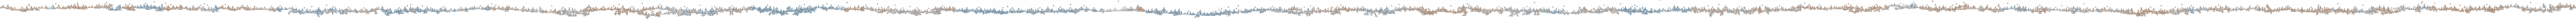

In [31]:
feature_cols = ["Age", "Sex", "Race", "Body_Part"]
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, filled=True, rounded=True, special_characters=True,feature_names = feature_cols,
    class_names=diagnosis)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('../../outputs/demographic-breakinjury.png')
Image(graph.create_png())